# Experimentation

## Libraries Import

## Data Ingestion

In [2]:
import pandas as pd
import numpy as np
import os

#from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.options.display.max_colwidth = None
pd.set_option("display.float_format", lambda x: '%.2f' % x)

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
FILE_NAME = "energydata_complete.csv"
DATA_FOLDER = "data"

In [4]:
main_path = os.getcwd()
main_path

'/Users/macbook/Documents/workspace_datahackerman/appliance_energy_prediction'

In [5]:
file_path = os.path.join(os.path.join(main_path, DATA_FOLDER), FILE_NAME)
file_path

'/Users/macbook/Documents/workspace_datahackerman/appliance_energy_prediction/data/energydata_complete.csv'

In [6]:
%%time
appliance_energy_data = pd.read_csv(file_path)

CPU times: user 114 ms, sys: 24.6 ms, total: 139 ms
Wall time: 147 ms


## Data Inspection

In [7]:
appliance_energy_data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.60,19.20,44.79,19.79,44.73,19.00,45.57,17.17,55.20,7.03,84.26,17.20,41.63,18.20,48.90,17.03,45.53,6.60,733.50,92.00,7.00,63.00,5.30,13.28,13.28
1,2016-01-11 17:10:00,60,30,19.89,46.69,19.20,44.72,19.79,44.79,19.00,45.99,17.17,55.20,6.83,84.06,17.20,41.56,18.20,48.86,17.07,45.56,6.48,733.60,92.00,6.67,59.17,5.20,18.61,18.61
2,2016-01-11 17:20:00,50,30,19.89,46.30,19.20,44.63,19.79,44.93,18.93,45.89,17.17,55.09,6.56,83.16,17.20,41.43,18.20,48.73,17.00,45.50,6.37,733.70,92.00,6.33,55.33,5.10,28.64,28.64
3,2016-01-11 17:30:00,50,40,19.89,46.07,19.20,44.59,19.79,45.00,18.89,45.72,17.17,55.09,6.43,83.42,17.13,41.29,18.10,48.59,17.00,45.40,6.25,733.80,92.00,6.00,51.50,5.00,45.41,45.41
4,2016-01-11 17:40:00,60,40,19.89,46.33,19.20,44.53,19.79,45.00,18.89,45.53,17.20,55.09,6.37,84.89,17.20,41.23,18.10,48.59,17.00,45.40,6.13,733.90,92.00,5.67,47.67,4.90,10.08,10.08


In [8]:
appliance_energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [9]:
TARGET = 'Appliances'

In [10]:
appliance_energy_data['date'] = pd.to_datetime(appliance_energy_data['date'],errors='coerce')

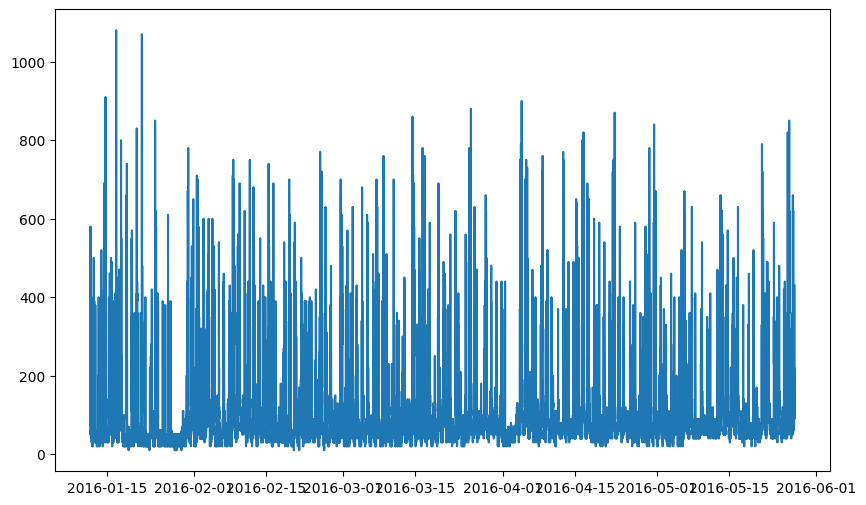

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(appliance_energy_data['date'], appliance_energy_data['Appliances']);
plt.savefig('images/appliances_date')

## 3.0 Model Building

In [16]:
appliance_energy_data.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

Features selection is very important in model building

Features creation or processing

In [13]:
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularDataset, TabularPredictor

In [17]:
appliance_energy_data.shape

(19735, 29)

In [18]:
train_data, test_data = train_test_split(appliance_energy_data,test_size = 0.30, random_state =42)

In [19]:
train_data.shape, test_data.shape

((13814, 29), (5921, 29))

In [21]:
train_data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
9129,2016-03-15 02:30:00,50,0,21.50,35.63,17.79,40.59,21.70,35.26,20.39,33.86,19.60,40.42,0.13,48.96,20.79,27.20,22.10,39.29,19.46,38.26,0.25,766.40,83.00,2.00,65.00,-2.35,36.23,36.23
2453,2016-01-28 17:50:00,30,0,19.50,44.56,18.70,44.29,19.82,44.50,18.10,43.86,17.20,52.00,3.39,86.70,18.89,39.08,18.79,45.20,17.20,46.16,3.17,765.27,85.33,2.00,40.00,0.97,43.20,43.20
9152,2016-03-15 06:20:00,40,0,20.79,35.40,16.89,42.03,21.70,36.00,19.70,33.20,19.29,39.90,-1.53,61.86,20.39,27.70,21.73,39.06,19.39,39.07,-1.57,766.00,89.33,1.33,60.67,-3.10,24.98,24.98
12694,2016-04-08 20:40:00,120,0,22.10,43.26,19.96,45.50,23.39,39.79,21.10,39.06,20.66,58.05,9.19,26.62,21.33,33.61,24.39,38.83,20.29,37.40,8.83,753.37,81.00,1.67,26.00,5.73,16.16,16.16
16952,2016-05-08 10:20:00,50,0,24.70,42.36,29.86,31.79,26.17,38.59,25.10,39.76,23.17,60.13,26.39,1.00,24.00,41.05,24.43,45.06,23.10,44.47,21.43,752.10,51.00,2.00,40.00,10.80,17.06,17.06


In [22]:
test_data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
8980,2016-03-14 01:40:00,40,0,20.89,35.40,17.76,39.16,20.29,36.90,19.76,34.20,18.60,51.29,1.20,63.82,21.60,33.66,23.07,39.75,19.29,39.03,1.77,768.90,88.33,2.33,63.00,0.00,25.62,25.62
2754,2016-01-30 20:00:00,90,10,21.89,53.10,21.29,45.36,21.63,49.23,20.53,40.97,17.68,58.20,2.53,97.09,16.89,39.34,20.62,47.56,16.29,44.20,2.70,754.60,90.00,3.00,27.00,1.20,23.47,23.47
9132,2016-03-15 03:00:00,50,0,21.39,35.50,17.63,40.53,21.67,35.20,20.29,33.76,19.60,40.29,-0.27,50.93,20.79,27.29,22.10,39.63,19.39,38.29,0.20,766.20,83.00,2.00,65.00,-2.40,0.14,0.14
14359,2016-04-20 10:10:00,50,0,21.39,41.03,23.89,34.84,22.03,36.93,22.39,35.24,19.63,43.27,11.16,10.30,20.05,30.39,21.20,38.09,20.29,38.56,8.85,767.80,70.83,5.17,40.00,3.72,10.29,10.29
8875,2016-03-13 08:10:00,70,0,19.96,35.13,16.46,40.13,20.00,36.40,19.26,34.97,17.89,49.00,-0.73,71.23,20.39,34.06,22.10,39.59,19.00,40.70,-0.47,769.65,93.33,4.00,48.83,-1.45,10.75,10.75


In [26]:
%%time

save_path = 'artefacts/models_regression'
time_limit = 60
predictor = TabularPredictor(label=TARGET, path= save_path,problem_type="regression").fit(train_data,time_limit=time_limit)

Beginning AutoGluon training ... Time limit = 60s
AutoGluon will save models to "artefacts/models_regression/"
AutoGluon Version:  0.7.0
Python Version:     3.9.16
Operating System:   Darwin
Platform Machine:   x86_64
Platform Version:   Darwin Kernel Version 20.6.0: Fri Dec 16 00:35:00 PST 2022; root:xnu-7195.141.49~1/RELEASE_X86_64
Train Data Rows:    13814
Train Data Columns: 28
Label Column: Appliances
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    6888.51 MB
	Train Data (Original)  Memory Usage: 3.09 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting DatetimeFeatureGenerator...
	St

CPU times: user 2min 30s, sys: 2.23 s, total: 2min 32s
Wall time: 1min 8s
